In [1]:
# Consider recent scene over UW campus:
import asf_search as asf
import geopandas as gpd
import pandas as pd
import os
import xarray as xr
import numpy as np

In [2]:
%load_ext watermark
%watermark -i

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
# Uses ~/.netrc with nasa credentials
os.environ['GDAL_DISABLE_READDIR_ON_OPEN']='EMPTY_DIR'
os.environ['GDAL_HTTP_COOKIEJAR']='/tmp/cookies.txt'
os.environ['GDAL_HTTP_COOKIEFILE']='/tmp/cookies.txt'

In [5]:
asf.__version__

'6.7.1'

In [6]:
# Available dataset keys
#asf.dataset_collections.keys()

In [7]:
asf.dataset_collections['OPERA-S1']

{'OPERA_L2_CSLC-S1_V1': ['C2777443834-ASF', 'C1259976861-ASF'],
 'OPERA_L2_RTC-S1_V1': ['C2777436413-ASF', 'C1259974840-ASF'],
 'OPERA_L2_CSLC-S1-STATIC_PROVISIONAL_V0': ['C1258354200-ASF'],
 'OPERA_L2_CSLC-S1-STATIC_V1': ['C1259982010-ASF'],
 'OPERA_L2_CSLC-S1_PROVISIONAL_V0': ['C1257995185-ASF'],
 'OPERA_L2_RTC-S1-STATIC_PROVISIONAL_V0': ['C1258354201-ASF'],
 'OPERA_L2_RTC-S1-STATIC_V1': ['C1259981910-ASF'],
 'OPERA_L2_RTC-S1_PROVISIONAL_V0': ['C1257995186-ASF'],
 'OPERA_L2_CSLC-S1-STATIC_CALVAL_V1': ['C1260726384-ASF'],
 'OPERA_L2_CSLC-S1_CALVAL_V1': ['C1260721945-ASF'],
 'OPERA_L2_RTC-S1_CALVAL_V1': ['C1260721853-ASF'],
 'OPERA_L2_RTC-S1-STATIC_CALVAL_V1': ['C1260726378-ASF']}

In [8]:
search_params = dict(
    intersectsWith='POINT(-121.744564 46.796787)',
    dataset='OPERA-S1', # Both CSLC and RTC
    processingLevel='RTC',
    #processingLevel='CSLC',
)

In [9]:
#results = asf_search.geo_search(**search_params) #TypeError: geo_search() got an unexpected keyword argument 'dataset'
results = asf.search(**search_params)
len(results)

14

In [10]:
gf = gpd.GeoDataFrame.from_features(results.geojson(), crs='EPSG:4326')
gf.head()

,geometry,beamModeType,browse,bytes,centerLat,centerLon,faradayRotation,fileID,flightDirection,groupID,...,sensor,startTime,stopTime,url,pgeVersion,fileName,frameNumber,beamMode,additionalUrls,operaBurstID
0,"POLYGON ((-121.56369 46.89002, -122.61413 47.0...",IW,[https://datapool.asf.alaska.edu/BROWSE/OPERA-...,None,None,None,None,OPERA_L2_RTC-S1_T115-245660-IW3_20231119T14141...,DESCENDING,S1A_IWDV_0438_0443_051287_115,...,C-SAR,2023-11-19T14:14:11Z,2023-11-19T14:14:14Z,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,2.0.1,OPERA_L2_RTC-S1_T115-245660-IW3_20231119T14141...,None,IW,[https://datapool.asf.alaska.edu/RTC/OPERA-S1/...,T115_245660_IW3
1,"POLYGON ((-122.07474 46.60581, -121.52719 46.6...",IW,[https://datapool.asf.alaska.edu/BROWSE/OPERA-...,None,None,None,None,OPERA_L2_RTC-S1_T064-135596-IW1_20231116T01542...,ASCENDING,S1A_IWDV_0148_0155_051236_064,...,C-SAR,2023-11-16T01:54:23Z,2023-11-16T01:54:26Z,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,2.0.1,OPERA_L2_RTC-S1_T064-135596-IW1_20231116T01542...,None,IW,[https://datapool.asf.alaska.edu/RTC/OPERA-S1/...,T064_135596_IW1
2,"POLYGON ((-121.35705 46.78796, -122.49428 46.9...",IW,[https://datapool.asf.alaska.edu/BROWSE/OPERA-...,None,None,None,None,OPERA_L2_RTC-S1_T013-026571-IW1_20231112T14222...,DESCENDING,S1A_IWDV_0437_0444_051185_013,...,C-SAR,2023-11-12T14:22:22Z,2023-11-12T14:22:25Z,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,2.0.1,OPERA_L2_RTC-S1_T013-026571-IW1_20231112T14222...,None,IW,[https://datapool.asf.alaska.edu/RTC/OPERA-S1/...,T013_026571_IW1
3,"POLYGON ((-121.35705 46.78796, -122.49428 46.9...",IW,[https://datapool.asf.alaska.edu/BROWSE/OPERA-...,None,None,None,None,OPERA_L2_RTC-S1_T013-026571-IW1_20231112T14222...,DESCENDING,S1A_IWDV_0437_0444_051185_013,...,C-SAR,2023-11-12T14:22:22Z,2023-11-12T14:22:25Z,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,2.0.1,OPERA_L2_RTC-S1_T013-026571-IW1_20231112T14222...,None,IW,[https://datapool.asf.alaska.edu/RTC/OPERA-S1/...,T013_026571_IW1
4,"POLYGON ((-121.85828 46.70884, -121.28293 46.7...",IW,[https://datapool.asf.alaska.edu/BROWSE/OPERA-...,None,None,None,None,OPERA_L2_RTC-S1_T137-292393-IW3_20231109T02023...,ASCENDING,S1A_IWDV_0147_0154_051134_137,...,C-SAR,2023-11-09T02:02:33Z,2023-11-09T02:02:36Z,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,2.0.1,OPERA_L2_RTC-S1_T137-292393-IW3_20231109T02023...,None,IW,[https://datapool.asf.alaska.edu/RTC/OPERA-S1/...,T137_292393_IW3


In [11]:
with pd.option_context('display.max_colwidth', 200):
    display(gf.drop(columns='geometry').iloc[0].to_frame())

,0
beamModeType,IW
browse,"[https://datapool.asf.alaska.edu/BROWSE/OPERA-S1/OPERA_L2_RTC-S1_T115-245660-IW3_20231119T141411Z_20231120T034905Z_S1A_30_v1.0_BROWSE.png, s3://asf-cumulus-prod-opera-browse/OPERA_L2_RTC-S1/OPERA_..."
bytes,None
centerLat,None
centerLon,None
faradayRotation,None
fileID,OPERA_L2_RTC-S1_T115-245660-IW3_20231119T141411Z_20231120T034905Z_S1A_30_v1.0
flightDirection,DESCENDING
groupID,S1A_IWDV_0438_0443_051287_115
granuleType,None


In [12]:
gf.operaBurstID.unique()

array(['T115_245660_IW3', 'T064_135596_IW1', 'T013_026571_IW1',
       'T137_292393_IW3'], dtype=object)

In [13]:
gf.operaBurstID.value_counts()

operaBurstID
T013_026571_IW1    5
T064_135596_IW1    4
T137_292393_IW3    3
T115_245660_IW3    2
Name: count, dtype: int64

In [14]:
subset = gf.groupby('operaBurstID').first().set_crs('EPSG:4326') #groupby drops CRS
subset.explore(column='sceneName')

In [15]:
# Pick burst with most scenes
stack = gf[gf.operaBurstID == 'T013_026571_IW1']
stack

,geometry,beamModeType,browse,bytes,centerLat,centerLon,faradayRotation,fileID,flightDirection,groupID,...,sensor,startTime,stopTime,url,pgeVersion,fileName,frameNumber,beamMode,additionalUrls,operaBurstID
2,"POLYGON ((-121.35705 46.78796, -122.49428 46.9...",IW,[https://datapool.asf.alaska.edu/BROWSE/OPERA-...,None,None,None,None,OPERA_L2_RTC-S1_T013-026571-IW1_20231112T14222...,DESCENDING,S1A_IWDV_0437_0444_051185_013,...,C-SAR,2023-11-12T14:22:22Z,2023-11-12T14:22:25Z,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,2.0.1,OPERA_L2_RTC-S1_T013-026571-IW1_20231112T14222...,None,IW,[https://datapool.asf.alaska.edu/RTC/OPERA-S1/...,T013_026571_IW1
3,"POLYGON ((-121.35705 46.78796, -122.49428 46.9...",IW,[https://datapool.asf.alaska.edu/BROWSE/OPERA-...,None,None,None,None,OPERA_L2_RTC-S1_T013-026571-IW1_20231112T14222...,DESCENDING,S1A_IWDV_0437_0444_051185_013,...,C-SAR,2023-11-12T14:22:22Z,2023-11-12T14:22:25Z,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,2.0.1,OPERA_L2_RTC-S1_T013-026571-IW1_20231112T14222...,None,IW,[https://datapool.asf.alaska.edu/RTC/OPERA-S1/...,T013_026571_IW1
6,"POLYGON ((-121.35686 46.78896, -122.49402 46.9...",IW,[https://datapool.asf.alaska.edu/BROWSE/OPERA-...,None,None,None,None,OPERA_L2_RTC-S1_T013-026571-IW1_20231031T14222...,DESCENDING,S1A_IWDV_0437_0444_051010_013,...,C-SAR,2023-10-31T14:22:22Z,2023-10-31T14:22:25Z,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,2.0.1,OPERA_L2_RTC-S1_T013-026571-IW1_20231031T14222...,None,IW,[https://datapool.asf.alaska.edu/RTC/OPERA-S1/...,T013_026571_IW1
9,"POLYGON ((-121.35667 46.78873, -121.41387 46.7...",IW,[https://datapool.asf.alaska.edu/BROWSE/OPERA-...,None,None,None,None,OPERA_L2_RTC-S1_T013-026571-IW1_20231019T14222...,DESCENDING,S1A_IWDV_0437_0444_050835_013,...,C-SAR,2023-10-19T14:22:23Z,2023-10-19T14:22:26Z,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,2.0.1,OPERA_L2_RTC-S1_T013-026571-IW1_20231019T14222...,None,IW,[https://datapool.asf.alaska.edu/RTC/OPERA-S1/...,T013_026571_IW1
13,"POLYGON ((-121.35611 46.78843, -121.41330 46.7...",IW,[https://datapool.asf.alaska.edu/BROWSE/OPERA-...,None,None,None,None,OPERA_L2_RTC-S1_T013-026571-IW1_20231007T14222...,DESCENDING,S1A_IWDV_0437_0444_050660_013,...,C-SAR,2023-10-07T14:22:23Z,2023-10-07T14:22:26Z,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,2.0.1,OPERA_L2_RTC-S1_T013-026571-IW1_20231007T14222...,None,IW,[https://datapool.asf.alaska.edu/RTC/OPERA-S1/...,T013_026571_IW1


In [16]:
stack.iloc[0:2].T

,2,3
geometry,"POLYGON ((-121.35705 46.78796, -122.49428 46.9...","POLYGON ((-121.35705 46.78796, -122.49428 46.9..."
beamModeType,IW,IW
browse,[https://datapool.asf.alaska.edu/BROWSE/OPERA-...,[https://datapool.asf.alaska.edu/BROWSE/OPERA-...
bytes,None,None
centerLat,None,None
centerLon,None,None
faradayRotation,None,None
fileID,OPERA_L2_RTC-S1_T013-026571-IW1_20231112T14222...,OPERA_L2_RTC-S1_T013-026571-IW1_20231112T14222...
flightDirection,DESCENDING,DESCENDING
groupID,S1A_IWDV_0437_0444_051185_013,S1A_IWDV_0437_0444_051185_013


In [17]:
# NOTE: some duplicates so favor later processingDate?

In [18]:
print(gpd.pd.DataFrame(stack.url).to_string())

                                                                                                                                  url
2   https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231112T142222Z_20231113T010035Z_S1A_30_v1.0_VH.tif
3   https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231112T142222Z_20231112T220617Z_S1A_30_v1.0_VH.tif
6   https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231031T142222Z_20231103T145613Z_S1A_30_v1.0_VH.tif
9   https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231019T142223Z_20231020T014815Z_S1A_30_v1.0_VH.tif
13  https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231007T142223Z_20231008T122428Z_S1A_30_v1.0_VH.tif


In [19]:
# VV tifs buried under additionalURLs
stack.iloc[0].additionalUrls

['https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231112T142222Z_20231113T010035Z_S1A_30_v1.0.h5',
 'https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231112T142222Z_20231113T010035Z_S1A_30_v1.0.iso.xml',
 'https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231112T142222Z_20231113T010035Z_S1A_30_v1.0_VV.tif',
 'https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231112T142222Z_20231113T010035Z_S1A_30_v1.0_mask.tif']

In [20]:
# All COGS Size is 3311, 1570
!gdalinfo -nomd /vsicurl/https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231112T142222Z_20231113T010035Z_S1A_30_v1.0_VV.tif

Driver: GTiff/GeoTIFF
Files: /vsicurl/https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231112T142222Z_20231113T010035Z_S1A_30_v1.0_VV.tif
Size is 3311, 1570
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 10N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 10N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-123,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",88

In [21]:
url = stack.iloc[0].url
print(url)
ds = xr.open_dataset(url, engine='rasterio') 
ds

https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231112T142222Z_20231113T010035Z_S1A_30_v1.0_VH.tif


<xarray.Dataset>
Dimensions:      (band: 1, x: 3311, y: 1570)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.314e+05 5.315e+05 ... 6.307e+05 6.307e+05
  * y            (y) float64 5.204e+06 5.204e+06 ... 5.157e+06 5.157e+06
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...

In [22]:
def extract_date(ds):
    '''assign tz-unaware date to time dimension on loading'''
    ds = ds.rename(band='time')
    ds['time'] = [pd.to_datetime(ds.band_data.attrs['ZERO_DOPPLER_START_TIME']).tz_localize(None)]
    return ds

In [23]:
ds = xr.open_mfdataset(stack.url.to_list(), 
                       engine='rasterio', 
                       chunks=-1,
                       open_kwargs={"overview_level": 0}, #-1 -> full res data 
                       preprocess=extract_date).rename(band_data='VH')

In [24]:
ds

<xarray.Dataset>
Dimensions:      (time: 4, x: 828, y: 393)
Coordinates:
  * time         (time) datetime64[ns] 2023-10-07T14:22:23.125602 ... 2023-11...
  * x            (x) float64 5.315e+05 5.316e+05 ... 6.306e+05 6.307e+05
  * y            (y) float64 5.204e+06 5.204e+06 ... 5.158e+06 5.157e+06
    spatial_ref  int64 0
Data variables:
    VH           (time, y, x) float32 dask.array<chunksize=(1, 393, 828), meta=np.ndarray>

In [25]:
# Plot them, note: should be faster...
ds_dB = 10*np.log10(ds.VH)


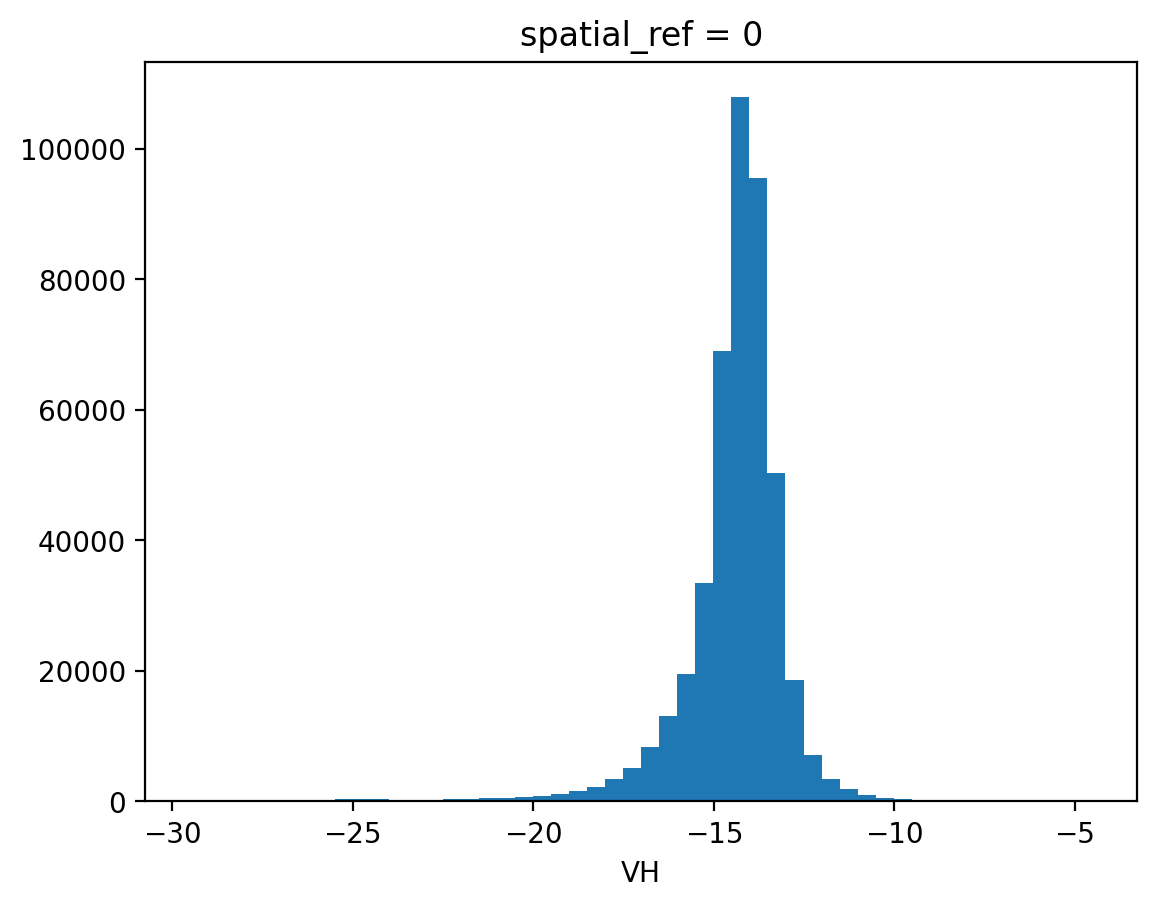

In [26]:
ds_dB.plot.hist(bins=50);

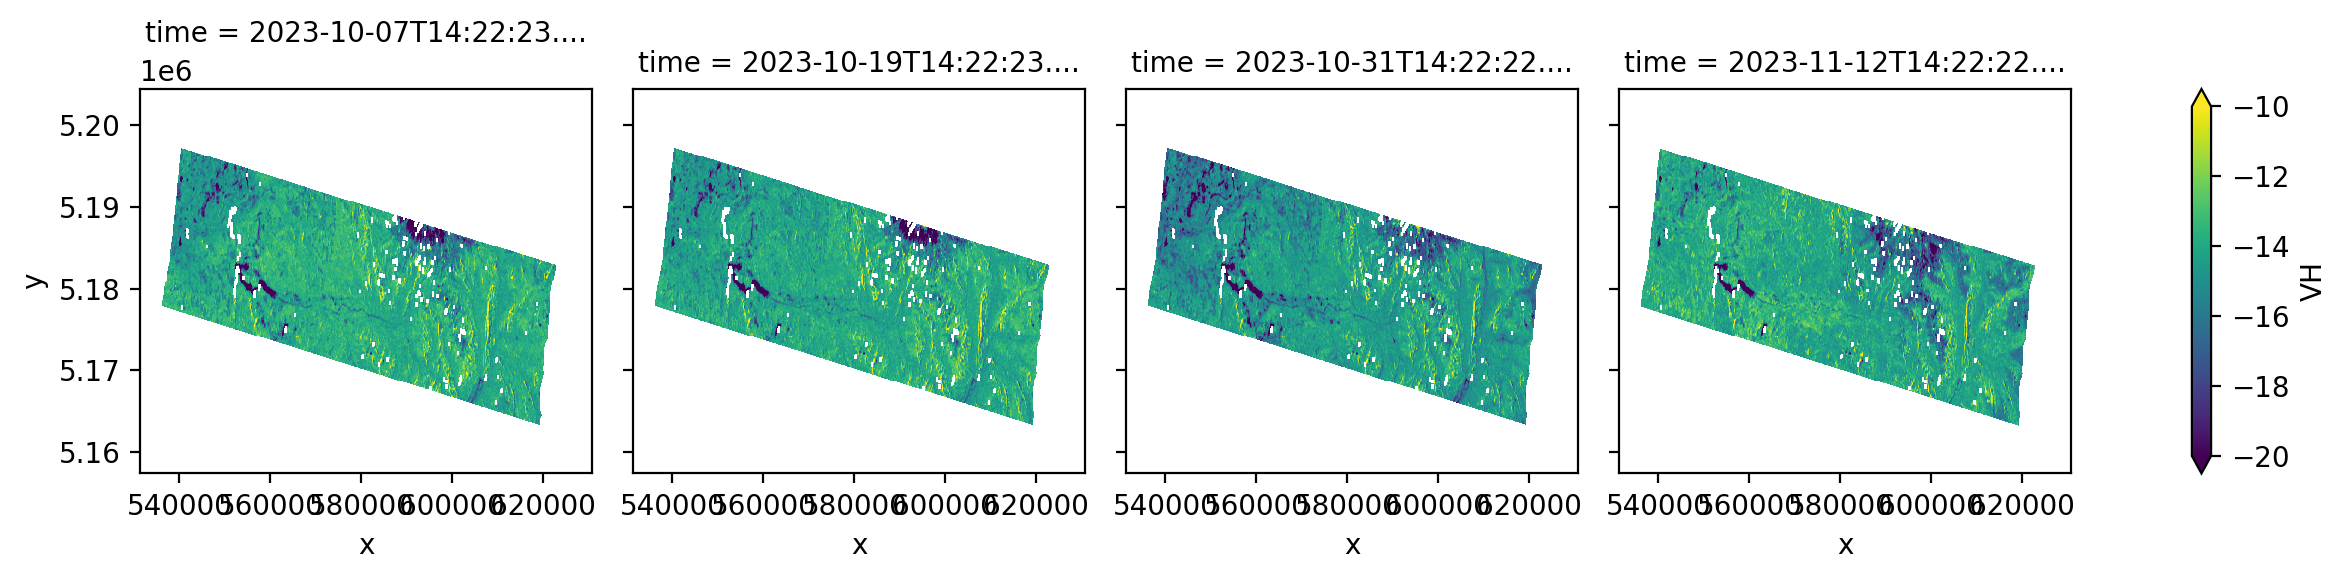

In [27]:
ds_dB.plot(col="time", vmin=-20, vmax=-10); # NaN regions expand in overviews due to averaging

In [28]:
# Warning: not sure order is always the same
vv_urls = stack.additionalUrls.str[2].to_list()
vv_urls

['https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231112T142222Z_20231113T010035Z_S1A_30_v1.0_VV.tif',
 'https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231112T142222Z_20231112T220617Z_S1A_30_v1.0_VV.tif',
 'https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231031T142222Z_20231103T145613Z_S1A_30_v1.0_VV.tif',
 'https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231019T142223Z_20231020T014815Z_S1A_30_v1.0_VV.tif',
 'https://datapool.asf.alaska.edu/RTC/OPERA-S1/OPERA_L2_RTC-S1_T013-026571-IW1_20231007T142223Z_20231008T122428Z_S1A_30_v1.0_VV.tif']

In [29]:
# Also load VV
dsVV = xr.open_mfdataset(vv_urls, 
                       engine='rasterio', 
                       chunks=-1,
                       open_kwargs={"overview_level": 0}, #-1 -> full res data 
                       preprocess=extract_date).rename(band_data='VV')

dsVV

<xarray.Dataset>
Dimensions:      (time: 4, x: 828, y: 393)
Coordinates:
  * time         (time) datetime64[ns] 2023-10-07T14:22:23.125602 ... 2023-11...
  * x            (x) float64 5.315e+05 5.316e+05 ... 6.306e+05 6.307e+05
  * y            (y) float64 5.204e+06 5.204e+06 ... 5.158e+06 5.157e+06
    spatial_ref  int64 0
Data variables:
    VV           (time, y, x) float32 dask.array<chunksize=(1, 393, 828), meta=np.ndarray>

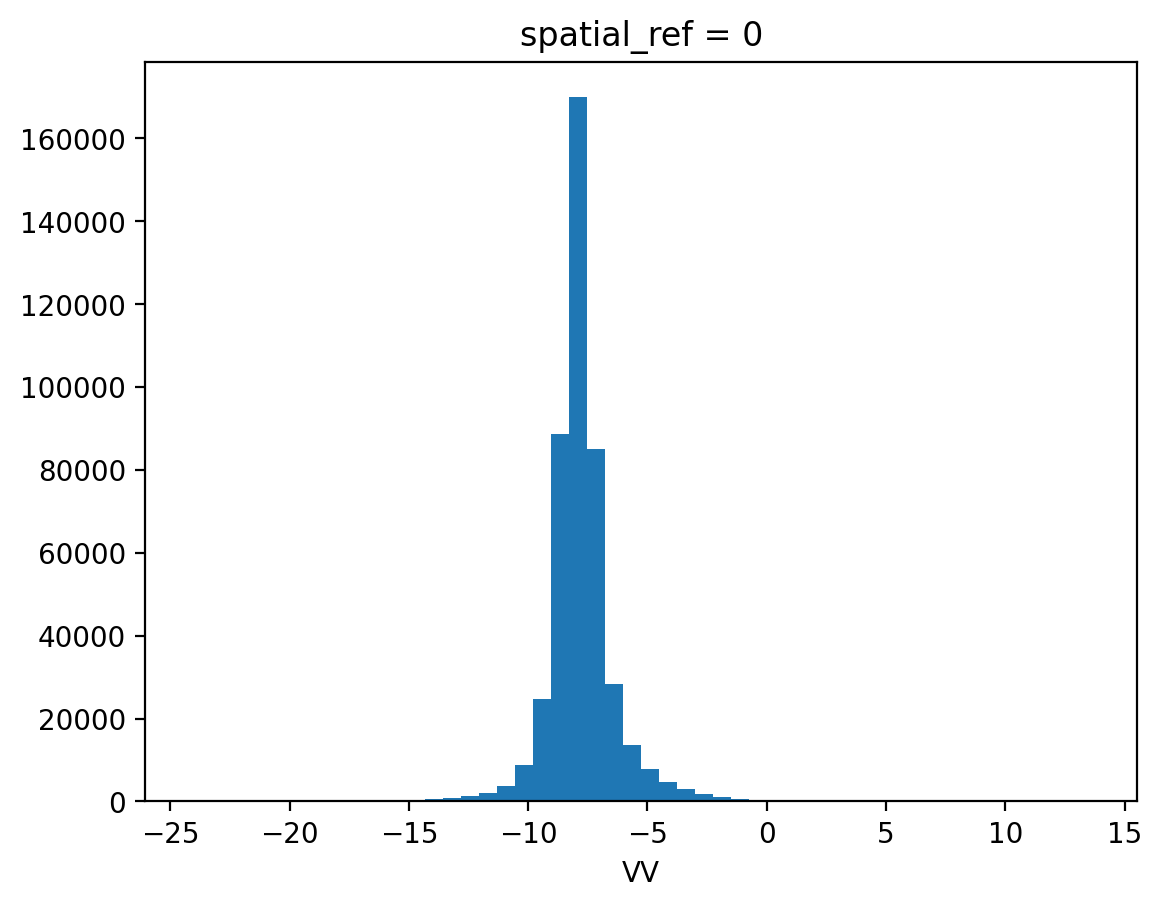

In [30]:
dsVV_dB = 10*np.log10(dsVV.VV)
dsVV_dB.plot.hist(bins=50);

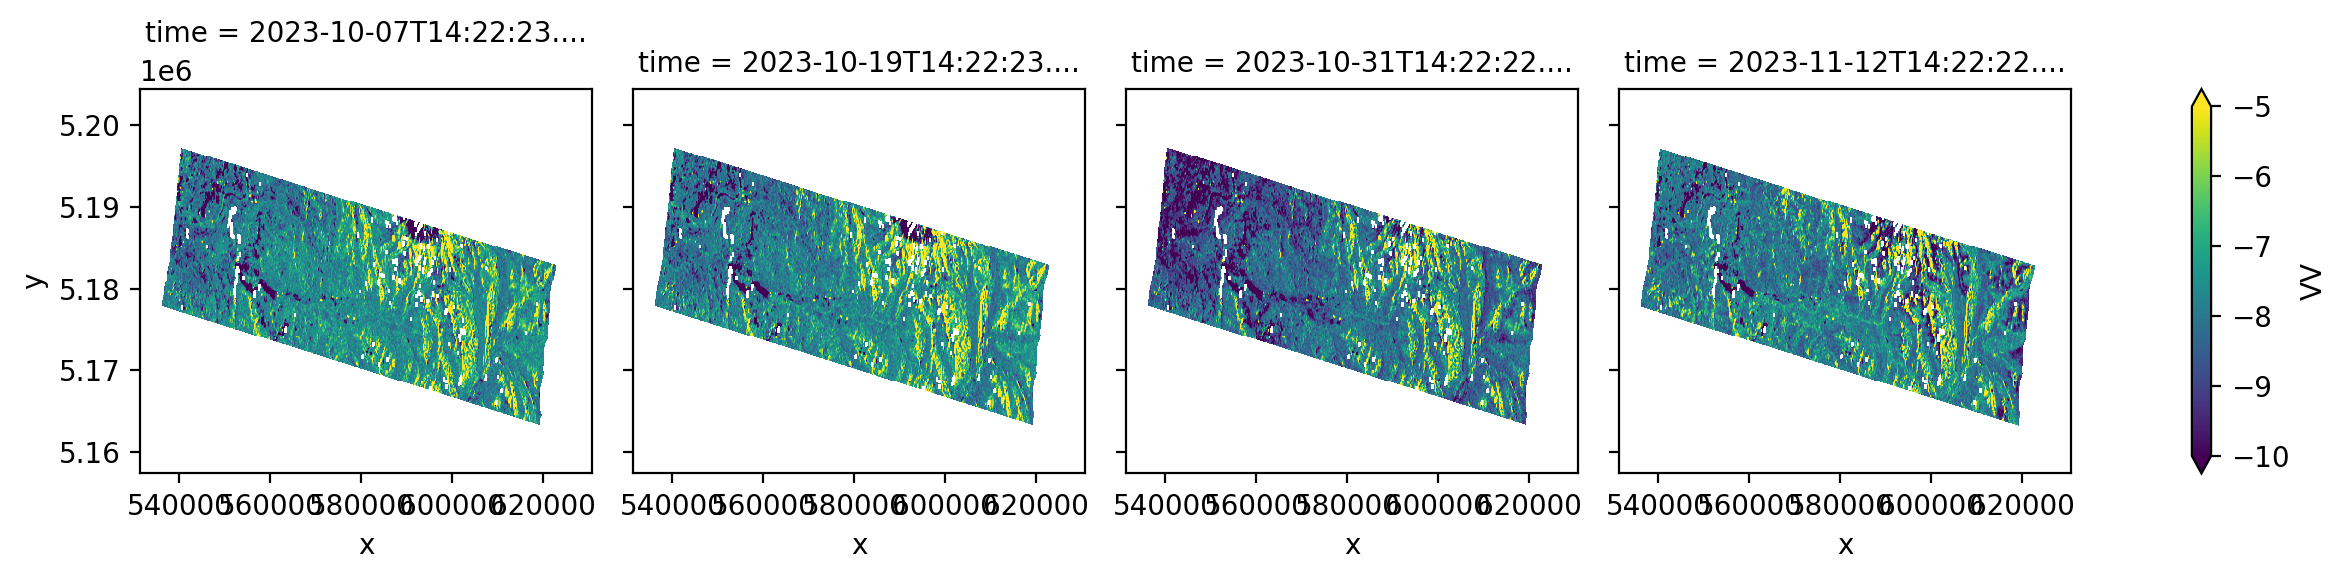

In [31]:
dsVV_dB.plot(col="time", vmin=-10, vmax=-5);